## Introduction and objectives

The covid pandemic changed the world for almost 2 years already. The way we work and live in society needed to be adapted control the spreading of the virus. Besides, many lifes have been lost due the disease, impacting not only socially but also reducing the life expectancy in some countries.

The vaccine against COVID-19 was developed in record time. In Pernambuco, the place where we are analysing, the vaccine took a bit longer to start being distributed, it only started by March 2021. Therefore, we can analyse the data before this date to speculate what might have happened if vaccines hadn't been developed so fast.

## Model

We're going to use two differents epidemic models, the **SEIRD** and the **SVIRS**. 

### SEIRD model
https://www.siam.org/Portals/0/Documents/S136293PDF.pdf?ver=2021-04-16-103030-153

The SEIRD model is an extension of a basic **SIR**, implemented by
subdividing a population of size into:
- **Susceptible** $S(t)$
- **Exposed** $E(t)$
- **Infectious** $I(t) = I_p(t) + I_a(t) + I_s(t)$
 - **Presymptomatic** $I_p(t)$
 - **Asymptomatic** $I_a(t)$
 - **Symptomatic** $I_s(t)$
- **Recovered** $R(t)$
- **Dead** $D(t)$

where $t ≥ 0$. Therefore, we have:

\begin{align}
N(t) & = S(t)+E(t)+I_p(t)+I_a(t)+I_s(t)+R(t) & \\
\frac{dN}{dt} & = - \frac{dD}{dt}
\end{align}

The movement rates between each subdivision are:
- **Iteraction Coeficient** $β ≥ 0$
- **Rate of Incubation** $σ ≥ 0$
 - The incubation period L of the disease is the period for which a person is infected but is not infectious, the inverse of this produces the rate of incubation $σ = \frac{1}{L}$
- **Presymptomatic Incubation Rate** $σ_p ≥ 0$
 - The presymptomatic incubation rate $σ_p = \frac{1}{P}$ is given by the inverse of the presymptomatic period for an infected person, that is the period for which a person is infectious but does not yet show symptoms. This is assumed to be a constant value of P = 2 days.
- **Probability of Asymptomatic Infection** $0 ≤ α ≤ 1$
 - The probability of asymptomatic infection α is the probability that following the presymptomatic period of infection the infected person will not develop symptoms. This is assumed to be 20%.
- **Infectivity Reduction Factor** $0 ≤ h ≤ 1$
 - The infectivity reduction factor h is a multiplicative factor that reduces the transmission rate between between Susceptible people contained in S and Infectious people that do not present symptoms contained in Ip and Ia. This is taken as the arithmetic mean of the transmission rate between asymptomatic and susceptible individuals.
- **Rate of Recovery** $γ ≥ 0$
 - The infectious period D is also known to vary from person to person and is taken from a uniform distribution in the interval [3,9] within the model, with the rate of recovery taken as the inverse of this infectious period γ = 1/D
- **Mortality** $0 ≤ µ ≤ 1$
 - Mortality is given as a probability of death at the end of the infectious period.

###(ver table 4 da pág 13 do pdf do link - alguns parâmetros precisam ser ajustados para a realidade brasileira)

This version of the SEIRD model allows for a potentially lethal disease to be modelled through the inclusion of the D compartment, while also allowing for different rates of transmission depending on if symptoms are present by considering the Ip, Ia and Is compartments as previously described. The movements between compartments is then given by the following system of ODEs:

\begin{align}
\frac{{\rm d}S}{{\rm d}t} & = - \frac{S}{N}\beta\bigg(I_s + h(I_a + I_p)\bigg) & \\ \\
\frac{{\rm d}E}{{\rm d}t} & = \frac{S}{N}\beta\bigg(I_s + h(I_a + I_p)\bigg) -\sigma E\\ \\
\frac{{\rm d}I_p}{{\rm d}t} & = \sigma E - \sigma_p I_p\\ \\
\frac{{\rm d}I_a}{{\rm d}t} & = \alpha \sigma_p I_p - \gamma I_a \\ \\
\frac{{\rm d}I_s}{{\rm d}t} & = (1-\alpha) \sigma_p I_p - \gamma I_s \\ \\
\frac{{\rm d}R}{{\rm d}t} & = \gamma (1-\mu) (I_a + i_s)\\ \\
\frac{{\rm d}D}{{\rm d}t} & = \gamma \mu (I_a + i_s)\\
\end{align}

### SVIRS model

This model is a variant of **SIR's** model that includes a new group to describe the population: the vaccinated. The **SVIRS** model also consider the possiblity of reinfection, this means that the acquired immunity after being vaccinated or after being recovered from the disease is not lifelong and, for this reason, the person can return to the succetibles group and being infected again.

In SVIRS model, the total population is divided into three groups:

* **Susceptibles $S(t)$**: individuals that can be part of infected group. 
* **Vaccinated $V(t)$**: individuals that are vaccinated with two doses and because of that had less chance to beeing infected.
* **Infected $I(t)$**: individuals infected with the disease.
* **Recovered $R(t)$**: individuals who were infected but now are recovered, having a period of immunity before becoming susceptible again. This is one of the differences from the SVIRS model to the SIR. In the SIR, the recovered have lifelong immunity and cannot become susceptible again.

So the total population is described as:

\begin{align}
N(t) = S(t) + V(t) + I(t) + R(t)
\end{align}

This model is described by the following ODEs:

\begin{align}
\frac{{\rm d}S}{{\rm d}t} & = \omega_rR - λS + \omega_vV - ΦS &\\ \\
\frac{{\rm d}V}{{\rm d}t} & = -(1 - Ψ)λV - \omega_vV + ΦS \\ \\
\frac{{\rm d}I}{{\rm d}t} & = λS + (1 - ψ)λV - γI \\ \\
\frac{{\rm d}R}{{\rm d}t} & = γI - ω_rR
\end{align}

Where:

1. $λ$ represents the infection rate per person and it is defined by $λ = \frac{βI}{N}$.
2. $β$ represents the probability of transmitting the disease between an susceptible and a infected individual.
3. $γ$ represents the recorvery rate and it is determined by $γ = \frac{1}{D}$ where $D$ is the average duration of inffection in days.
4. $\omega_r$ represents the rate that a recovered individual comeback to susceptibles' group because of immunity loss.
5. $\omega_v$ represents the rate that vaccinated individuals comeback do succeptibles' group because of immunity loss.
6. $Φ$ represents the vaccination rate.
7. $ψ$ represents the vaccine efficieny rate. 



##Parâmetros

To analise each one of the sceanrios that will be modeled, it would be necessary adjust the model parameters. We know that the vaccine efficiency rate varies between your manufacturer (CoronaVac, AstraZeneca, Pfizer, Jansen...), so with the aim of seeking a higher precision, we will utilize a weighted average of the efficacies of these different variations of the coronavirus vaccine and the percentage of doses that were applied. 

##Cálculo da Eficácia Média $→$ $\psi$



## Resultados e discussão

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import requests
from scipy.integrate import odeint

In [ ]:
# Primeiramente, vamos baixar o nosso dataset sobre a COVID-19 em Pernambuco
URL = "https://raw.githubusercontent.com/SarahLMelo/Covid19VaccineAnalysis/main/COVID-19%20em%20Dados.csv?token=GHSAT0AAAAAABWBDR4RCTNKM6UO6SAS4HQYYYRLVCQ"
response = requests.get(URL)
open("dataset.csv", "wb").write(response.content)

# Agora iremos extrair os dados do nosso dataset (que é um arquivo de extensão .CSV) e armazena-los em um DataFrame do Pandas
dataset = pd.read_csv('/content/dataset.csv', sep=',', on_bad_lines='skip')
dataset.tail()

,dt_referencia,dt_atualizacao,confirmados,obitos,tx_obitos,recuperados,tx_recuperados,isolamento,tx_isolamento,enfermaria,tx_enfermaria,uti,tx_uti,testes_novos,testes_acumulados,tx_testes,leitos_uti,tx_oc_uti,leitos_enf,tc_oc_enf
867,2022-08-18,NaN,1042635,22142,0.021,894397,0.858,45,0.0,739,0.005,615,0.001,4510,4542139,473139,616,0.70,555,0.53
868,2022-08-19,NaN,1043102,22146,0.021,896042,0.859,45,0.0,739,0.005,615,0.001,3784,4545923,473534,616,0.69,555,0.49
869,2022-08-20,NaN,1043225,22151,0.021,896142,0.859,45,0.0,739,0.005,615,0.001,1614,4547537,473702,616,0.71,555,0.50
870,2022-08-21,NaN,1043280,22156,0.021,896148,0.859,45,0.0,739,0.005,615,0.001,1242,4548779,473831,615,0.71,555,0.50
871,2022-08-22,NaN,1044002,22160,0.021,896758,0.859,45,0.0,739,0.005,615,0.001,4564,4553343,474307,615,0.69,555,0.45


Text(0, 0.5, 'Date')

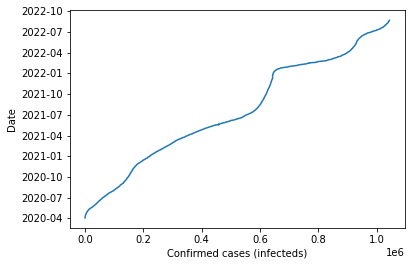

In [ ]:
# Agora iremos guardar em uma lista as datas referentes a cada linha de dados do nosso CSV 
dates = mdates.datestr2num(dataset['dt_referencia'].tolist())

# Vamos filtrar os dados sobre a qtd. de casos confirmados
confirmedCases = dataset['confirmados'].tolist()

# Plotando os dados (casos confirmados de COVID-19 entre Abril de 2020 e ?? de 2022 em PE)
fig, ax = plt.subplots()
ax.yaxis_date()

plt.plot(confirmedCases, dates)
plt.xlabel("Confirmed cases (infecteds)")
plt.ylabel("Date")

Text(0, 0.5, 'Date')

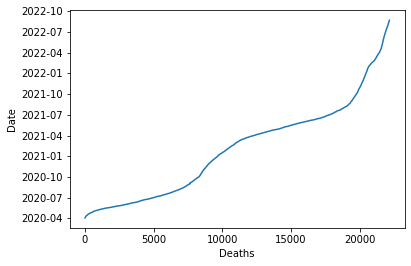

In [ ]:
# Agora vamos filtrar os dados sobre a qtd. de mortes
deaths = dataset['obitos'].tolist()

# Plotando os dados (mortes por COVID-19 entre Abril de 2020 e ?? de 2022 em PE)
fig, ax = plt.subplots()
ax.yaxis_date()

plt.plot(deaths, dates)
plt.xlabel("Deaths")
plt.ylabel("Date")

Text(0, 0.5, 'Date')

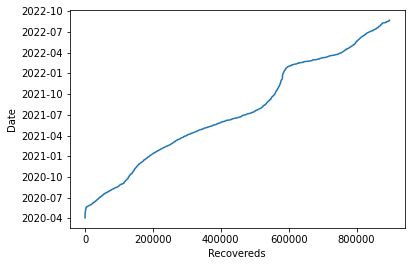

In [ ]:
# Por fim, vamos filtar a qtd. de recuperados
recovereds = dataset['recuperados'].tolist()

# Plotando os dados (recuperados da COVID-19 entre Abril de 2020 e ?? de 2022 em PE)
fig, ax = plt.subplots()
ax.yaxis_date()

plt.plot(recovereds, dates)
plt.xlabel("Recovereds")
plt.ylabel("Date")

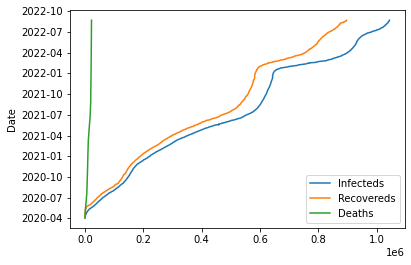

In [ ]:
# Agora vamos plotar um gráfico contendo a qtd. de casos confirmados, a qtd. de mortos e a qtd. de recuperados
fig, ax = plt.subplots()
ax.yaxis_date()

plt.plot(confirmedCases, dates, label="Infecteds")
plt.plot(recovereds, dates, label="Recovereds")
plt.plot(deaths, dates, label="Deaths")

plt.ylabel("Date")
plt.legend()